In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('./master.csv')


In [44]:
#fig = plt.figure(figsize=(20,6))
aggregation_functions = {'suicides_no': 'sum'}
df_age = df.groupby(df['age']).aggregate(aggregation_functions)
df_age = df_age.sort_index()
df_age.head(6)


             suicides_no
age                     
15-24 years       808542
25-34 years      1123912
35-54 years      2452141
5-14 years         52264
55-74 years      1658443
75+ years         653118


In [45]:
df_sex = df.groupby(df['sex']).aggregate(aggregation_functions)

#df_sex.head()

In [46]:
df_multiple = df.groupby(['age', 'sex']).agg(aggregation_functions)
df_multiple = df_multiple.reset_index()
df_multiple.head(12)


,age,sex,suicides_no
0,15-24 years,female,175437
1,15-24 years,male,633105
2,25-34 years,female,208823
3,25-34 years,male,915089
4,35-54 years,female,506233
5,35-54 years,male,1945908
6,5-14 years,female,16997
7,5-14 years,male,35267
8,55-74 years,female,430036
9,55-74 years,male,1228407


Text(0, 0.5, 'Number of Suicides')

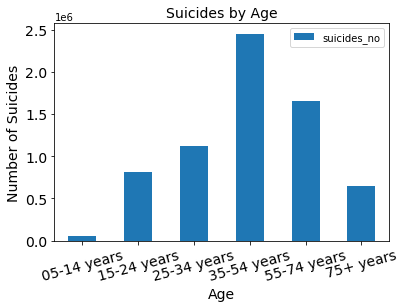

In [60]:
df_age = df_age.rename(index={'5-14 years': '05-14 years'})
df_age = df_age.sort_index()
ax = df_age.plot.bar(rot=15,fontsize='14')

plt.title("Suicides by Age",fontsize='14')
plt.xlabel("Age",fontsize='14')
plt.ylabel("Number of Suicides",fontsize='14')

Text(0.5, 1.0, 'Suicide Numbers by sex')

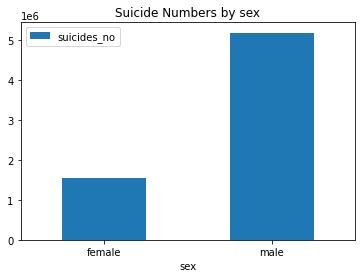

In [48]:
ax = df_sex.plot.bar(rot=0)
plt.title("Suicide Numbers by sex")

Text(0, 0.5, 'Number of Suicides')

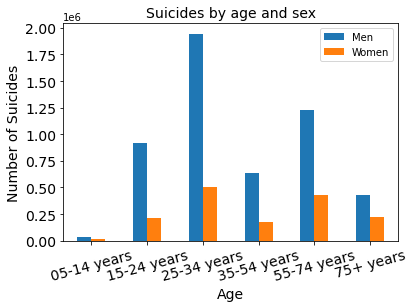

In [58]:


list_men, list_women = [],[]
for i in range(len(df_multiple)):
    if i%2:
        list_men.append(df_multiple.values[i][2])
    else:
        list_women.append(df_multiple.values[i][2])
        
plotdata = pd.DataFrame({
    "Men":list_men,
    "Women":list_women,
    
    }, 
    index=df_age.index.tolist()
)

plotdata = plotdata.rename(index={'5-14 years': '05-14 years'})
plotdata = plotdata.rename(index={'05-14 years': '35-54 years','35-54 years': '05-14 years'})
plotdata = plotdata.sort_index()
plotdata.plot(kind="bar",rot=15,fontsize="14")
plt.title("Suicides by age and sex",fontsize='14')
plt.xlabel("Age",fontsize='14')
plt.ylabel("Number of Suicides",fontsize='14')


Text(0.5, 1.0, 'Number of Suicides per Year')

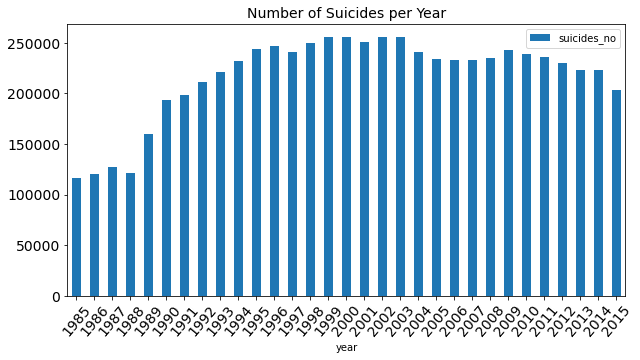

In [64]:
aggregation_functions = {'suicides_no': 'sum'}

df_yr_sex = df.groupby(['year', 'sex']).agg(aggregation_functions)
df_yr = df.groupby(df['year']).aggregate(aggregation_functions)
df_yr = df_yr.drop(2016)
df_yr.plot(kind="bar",rot = '50',figsize=(10,5),fontsize='14')
plt.title('Number of Suicides per Year',fontsize='14')

In [10]:
df_yr

,suicides_no
year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244
1990,193361
1991,198020
1992,211473
1993,221565


Text(0.5, 1.0, 'Suicide percentages by sex')

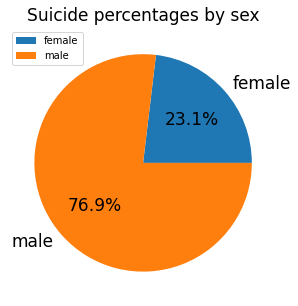

In [36]:
plot = df_sex.plot.pie(subplots=True ,figsize=(5, 5),autopct='%1.1f%%',fontsize='17')
plt.ylabel("")
plt.title("Suicide percentages by sex",fontsize="17")